<a href="https://colab.research.google.com/github/SonalM-2301/SonalM-2301/blob/main/Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Delhivery, a logistics and supply chain company, generates large volumes of operational data from its transportation and delivery pipelines. This raw data contains information related to trip creation, routes, distances, delivery times, and segment-level movements.

**Primary Objective**

To analyze, clean, and explore Delhivery’s trip-level and segment-level data in order to:

Understand delivery performance across different routes and transportation types

Identify patterns, delays, and inefficiencies in actual vs expected (OSRM) delivery times

Generate insights and features that can support accurate delivery time forecasting models

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import ttest_rel



In [70]:
df=pd.read_csv("delhivery_data.txt")

In [71]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [72]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [73]:
df.shape

(144867, 24)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [75]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


**missing value detection**

In [76]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [77]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

,0
data,0.000000
trip_creation_time,0.000000
route_schedule_uuid,0.000000
route_type,0.000000
trip_uuid,0.000000
source_center,0.000000
source_name,0.202254
destination_center,0.000000
destination_name,0.180165
od_start_time,0.000000


**Handle missing values in the data.**

In [78]:
missing_threshold = 0.5  # 50%

df = df.loc[:, df.isnull().mean() < missing_threshold]


**Impute Numerical Columns**

In [79]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-702769985.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


**Conversion of Categorical Attributes to category**

In [80]:
time_cols_to_exclude_from_category = [
    'trip_creation_time',
    'od_start_time',
    'od_end_time',
    'cutoff_timestamp' # This is also a timestamp column
]

# Get all object columns
object_cols = df.select_dtypes(include='object').columns

# Filter out time-like columns from the object columns to get true categorical object columns
categorical_object_cols = [col for col in object_cols if col not in time_cols_to_exclude_from_category]

# Convert only the true categorical object columns to 'category'
df[categorical_object_cols] = df[categorical_object_cols].astype('category')

**Impute Categorical Columns**

In [81]:
cat_cols = df.select_dtypes(include='category').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2393879063.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [82]:
df.isnull().sum().sum()


np.int64(0)

**Remove Invalid Records**

In [83]:
df = df[df['actual_time'] > 0]
df = df[df['actual_distance_to_destination'] > 0]
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


**Observations**

The dataset contains segment-level logistics data with multiple entries per trip.

Several auxiliary columns had high missing values and were removed.

Numerical missing values were imputed using median to reduce outlier impact.

Categorical missing values were imputed using mode.

After cleaning, the dataset is consistent and suitable for exploratory analysis and modeling.

**Converting time columns into pandas datetime.**

In [84]:
time_cols = [
    'trip_creation_time',
    'od_start_time',
    'od_end_time',
    'cutoff_timestamp'
]
for col in time_cols:
    df[col] = pd.to_datetime(df[col].astype(str), errors='coerce') # Added .astype(str)
df[time_cols].dtypes

,0
trip_creation_time,datetime64[ns]
od_start_time,datetime64[ns]
od_end_time,datetime64[ns]
cutoff_timestamp,datetime64[ns]


**Grouping by segment**

In [85]:
df['segment_key'] = (
    df['trip_uuid'].astype(str) + '_' +
    df['source_center'].astype(str) + '_' +
    df['destination_center'].astype(str)
)
df['segment_key'].head()

,segment_key
0,trip-153741093647649320_IND388121AAA_IND388620AAB
1,trip-153741093647649320_IND388121AAA_IND388620AAB
2,trip-153741093647649320_IND388121AAA_IND388620AAB
3,trip-153741093647649320_IND388121AAA_IND388620AAB
4,trip-153741093647649320_IND388121AAA_IND388620AAB


In [86]:
df['segment_actual_time_sum'] = (
    df.groupby('segment_key')['segment_actual_time']
      .cumsum()
)

df['segment_osrm_distance_sum'] = (
    df.groupby('segment_key')['segment_osrm_distance']
      .cumsum()
)

df['segment_osrm_time_sum'] = (
    df.groupby('segment_key')['segment_osrm_time']
      .cumsum()
)


In [87]:
df[
    [
        'segment_key',
        'segment_actual_time',
        'segment_actual_time_sum',
        'segment_osrm_distance',
        'segment_osrm_distance_sum',
        'segment_osrm_time',
        'segment_osrm_time_sum'
    ]
].head()


,segment_key,segment_actual_time,segment_actual_time_sum,segment_osrm_distance,segment_osrm_distance_sum,segment_osrm_time,segment_osrm_time_sum
0,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,14.0,11.9653,11.9653,11.0,11.0
1,trip-153741093647649320_IND388121AAA_IND388620AAB,10.0,24.0,9.7590,21.7243,9.0,20.0
2,trip-153741093647649320_IND388121AAA_IND388620AAB,16.0,40.0,10.8152,32.5395,7.0,27.0
3,trip-153741093647649320_IND388121AAA_IND388620AAB,21.0,61.0,13.0224,45.5619,12.0,39.0
4,trip-153741093647649320_IND388121AAA_IND388620AAB,6.0,67.0,3.9153,49.4772,5.0,44.0


**Aggregating at Segment Level**

In [88]:
create_segment_dict = {
    # Identifiers / categorical – keep first occurrence
    'trip_uuid': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'data': 'first',

    # Time columns – logical first/last
    'od_start_time': 'first',
    'od_end_time': 'last',
    'trip_creation_time': 'first',

    # Aggregated segment metrics
    'segment_actual_time_sum': 'max',
    'segment_osrm_distance_sum': 'max',
    'segment_osrm_time_sum': 'max',

    # Trip-level metrics (keep representative value)
    'actual_distance_to_destination': 'first',
    'actual_time': 'first',
    'osrm_time': 'first',
    'osrm_distance': 'first'
}


In [89]:
segment = (
    df.groupby('segment_key', as_index=False)
    .agg(create_segment_dict)
)


In [90]:
segment = segment.sort_values(
    by=['segment_key', 'od_end_time'],
    ascending=[True, True]
)
segment.head()

,segment_key,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,data,od_start_time,od_end_time,trip_creation_time,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),training,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,728.0,670.6205,534.0,34.015100,50.0,33.0,38.0620
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),training,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,820.0,649.8528,474.0,22.812439,43.0,39.0,55.2597
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),training,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,46.0,28.1995,26.0,9.357635,18.0,10.0,10.8633
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),training,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,95.0,55.9899,39.0,9.832310,14.0,8.0,10.3544
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),training,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,608.0,317.7408,231.0,24.680127,36.0,19.0,27.2834


**Feature Engineering:**

In [91]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'], errors='coerce')
df['od_end_time'] = pd.to_datetime(df['od_end_time'], errors='coerce')

In [92]:
df['od_time_diff_hour'] = (
    (df['od_end_time'] - df['od_start_time'])
    .dt.total_seconds() / 3600
)

In [93]:
df['od_time_diff_hour']= (pd.to_datetime(df['od_end_time'].astype(str)) - pd.to_datetime(df['od_start_time'].astype(str)))

In [94]:
df[['od_time_diff_hour']].describe()


,od_time_diff_hour
count,144867
mean,0 days 16:01:45.540162508
std,0 days 17:17:00.756769460
min,0 days 00:20:42.168787
25%,0 days 02:41:30.077518
50%,0 days 07:29:14.194038
75%,1 days 03:14:57.008596
max,5 days 11:38:33.117274


In [95]:
df['destination_name'].head(10)

,destination_name
0,Khambhat_MotvdDPP_D (Gujarat)
1,Khambhat_MotvdDPP_D (Gujarat)
2,Khambhat_MotvdDPP_D (Gujarat)
3,Khambhat_MotvdDPP_D (Gujarat)
4,Khambhat_MotvdDPP_D (Gujarat)
5,Anand_Vaghasi_IP (Gujarat)
6,Anand_Vaghasi_IP (Gujarat)
7,Anand_Vaghasi_IP (Gujarat)
8,Anand_Vaghasi_IP (Gujarat)
9,Anand_Vaghasi_IP (Gujarat)


In [96]:

df['destination_name_clean'] = df['destination_name'].str.replace('-', '_')
dest_split = df['destination_name_clean'].str.split('_', expand=True)
df['destination_city'] = dest_split[0]
df['destination_place'] = dest_split[1]
df['destination_state_code'] = dest_split[2]


In [97]:
df[['destination_city', 'destination_place', 'destination_state_code']] = (
    df[['destination_city', 'destination_place', 'destination_state_code']]
    .fillna('Unknown')
)


In [98]:
new_cat_cols = [
    'destination_city',
    'destination_place',
    'destination_state_code'
]

df[new_cat_cols] = df[new_cat_cols].astype('category')


In [99]:
df['source_name_clean'] = df['source_name'].str.replace('-', '_')
source_split = df['source_name_clean'].str.split('_', expand=True)
df['source_city'] = source_split[0]
df['source_place'] = source_split[1]
df['source_state_code'] = source_split[2]


In [100]:
df[['source_city', 'source_place', 'source_state_code']] = (
    df[['source_city', 'source_place', 'source_state_code']]
    .fillna('Unknown')
)


In [101]:
source_cat_cols = [
    'source_city',
    'source_place',
    'source_state_code'
]

df[source_cat_cols] = df[source_cat_cols].astype('category')


In [102]:
df['trip_creation_time'] = pd.to_datetime(
    df['trip_creation_time'],
    errors='coerce'
)


In [103]:
df['trip_year'] = df['trip_creation_time'].dt.year
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_day'] = df['trip_creation_time'].dt.day
df['trip_weekday'] = df['trip_creation_time'].dt.weekday
df['trip_hour'] = df['trip_creation_time'].dt.hour


**In-depth analysis:**


*   Grouping and Aggregating at Trip Level




In [104]:
create_trip_dict = {
    # Categorical / identifiers
    'route_type': 'first',
    'data': 'first',
    'source_center': 'first',
    'destination_center': 'last',

    # Time-based
    'trip_creation_time': 'first',
    'od_time_diff_hour': 'sum',

    # Distance & time metrics
    'segment_actual_time_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',

    'actual_time': 'first',
    'actual_distance_to_destination': 'first',
    'osrm_time': 'first',
    'osrm_distance': 'first'
}


trip_df = (
    df
    .groupby('trip_uuid', as_index=False)
    .agg(create_trip_dict)
)

trip_df.head()


/tmp/ipython-input-4262814089.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('trip_uuid', as_index=False)


,trip_uuid,route_type,data,source_center,destination_center,trip_creation_time,od_time_diff_hour,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,actual_time,actual_distance_to_destination,osrm_time,osrm_distance
0,trip-153671041653548748,FTL,training,IND462022AAA,IND000000ACB,2018-09-12 00:00:16.535741,30 days 08:00:29.552238,15516.0,10670.0,14222.1104,43.0,22.812439,39.0,55.2597
1,trip-153671042288605164,Carting,training,IND572101AAA,IND562101AAA,2018-09-12 00:00:22.886430,0 days 15:13:10.444758,396.0,199.0,268.5094,14.0,9.832310,8.0,10.3544
2,trip-153671043369099517,FTL,training,IND562132AAA,IND160002AAC,2018-09-12 00:00:33.691250,172 days 16:54:23.020843,110876.0,70971.0,90479.7151,60.0,26.908354,27.0,30.0119
3,trip-153671046011330457,Carting,training,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,0 days 03:20:59.392224,82.0,25.0,31.8441,23.0,11.354374,9.0,11.9675
4,trip-153671052974046625,FTL,training,IND583101AAA,IND583101AAA,2018-09-12 00:02:09.740725,1 days 02:28:42.659880,555.0,204.0,266.2915,42.0,22.342846,17.0,23.8920


**Outlier Detection & Treatment**
a. Find any existing outliers in numerical features.
b. Visualize the outlier values using Boxplot.
c. Handle the outliers using the IQR method.

In [105]:
num_cols = trip_df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'actual_time',
       'actual_distance_to_destination', 'osrm_time', 'osrm_distance'],
      dtype='object')

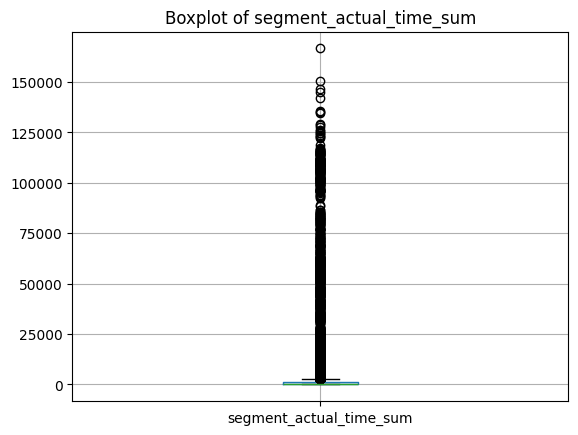

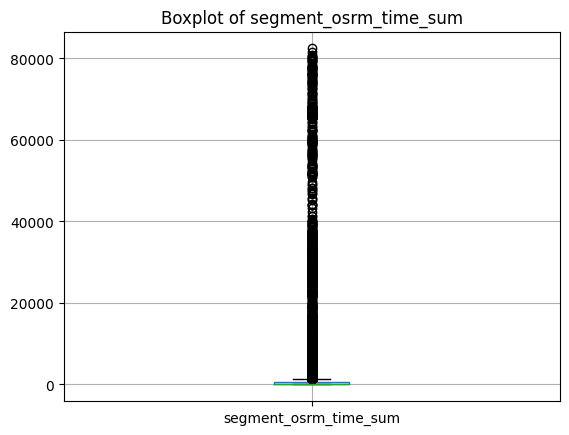

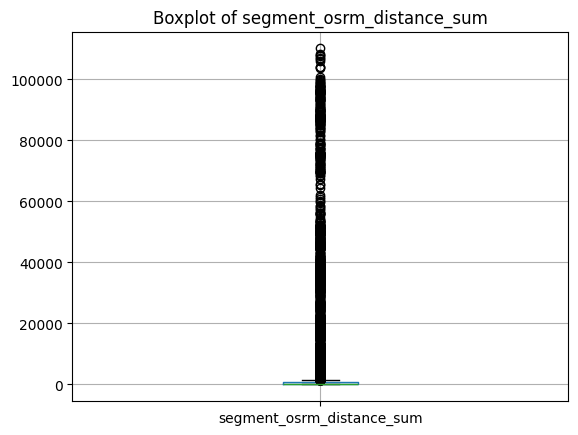

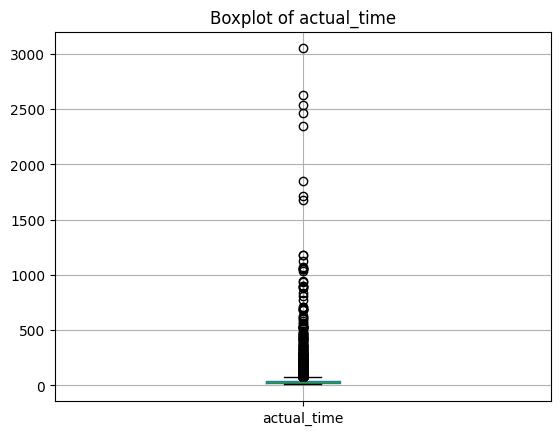

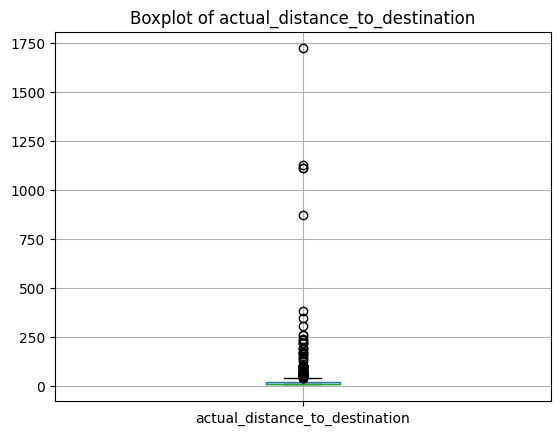

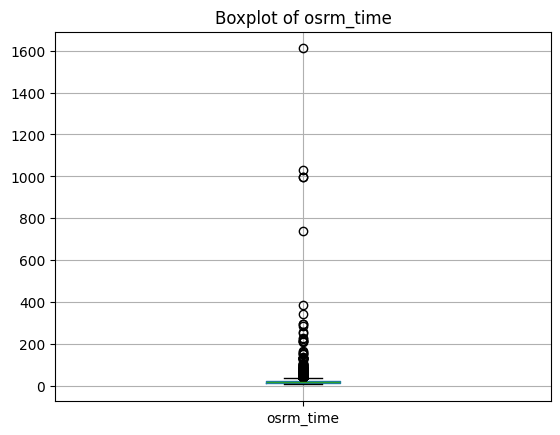

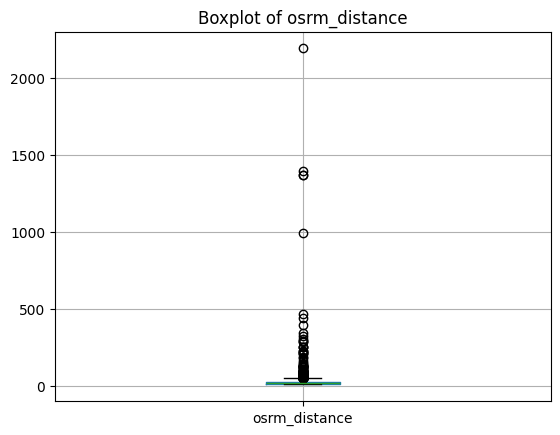

In [106]:
for col in num_cols:
    plt.figure()
    trip_df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [107]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in num_cols:
    trip_df = remove_outliers_iqr(trip_df, col)


**Perform one-hot encoding on categorical features.**

In [108]:
cat_cols = trip_df.select_dtypes(include='category').columns
cat_cols


Index(['trip_uuid', 'route_type', 'data', 'source_center',
       'destination_center'],
      dtype='object')

In [109]:
trip_df_encoded = pd.get_dummies(
    trip_df,
    columns=cat_cols,
    drop_first=True
)
trip_df_encoded.shape


(9239, 17814)

Normalize/ Standardize the numerical features using MinMaxScaler or
StandardScaler .

In [110]:
num_cols = trip_df_encoded.select_dtypes(include=['int64', 'float64']).columns

In [111]:
scaler = StandardScaler()

trip_df_encoded[num_cols] = scaler.fit_transform(
    trip_df_encoded[num_cols]
)
minmax = MinMaxScaler()

trip_df_encoded[num_cols] = minmax.fit_transform(
    trip_df_encoded[num_cols]
)


In [112]:
trip_df_encoded.describe()


,trip_creation_time,od_time_diff_hour,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,actual_time,actual_distance_to_destination,osrm_time,osrm_distance
count,9239,9239,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000
mean,2018-09-22 16:36:48.559754496,0 days 14:16:05.192121079,0.116190,0.185692,0.237269,0.296980,0.182394,0.360926,0.315725
min,2018-09-12 00:00:22.886430,0 days 00:26:29.949865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-09-17 06:26:18.673929984,0 days 05:08:27.537827,0.038429,0.055172,0.074093,0.150000,0.017627,0.227273,0.130188
50%,2018-09-22 08:26:07.041464064,0 days 09:52:51.345672,0.073935,0.124138,0.155946,0.250000,0.042599,0.318182,0.207390
75%,2018-09-28 00:37:21.318327552,0 days 18:48:06.569290500,0.153718,0.264828,0.337909,0.400000,0.109950,0.500000,0.379778
max,2018-10-03 23:59:42.701692,6 days 14:19:55.791784,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0 days 13:59:23.826360431,0.118144,0.176126,0.233500,0.199315,0.293539,0.215171,0.272462


**Hypothesis Testing:**
1. Perform hypothesis testing / visual analysis between :
a. actual_time aggregated value and OSRM time aggregated value.
b. actual_time aggregated value and segment actual time aggregated
value.
c. OSRM distance aggregated value and segment OSRM distance
aggregated value.
d. OSRM time aggregated value and segment OSRM time aggregated
value.

2. Note: Aggregated values are the values you’ll get after merging the rows on the
basis of trip_uuid.

In [113]:
trip_df.head()

,trip_uuid,route_type,data,source_center,destination_center,trip_creation_time,od_time_diff_hour,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,actual_time,actual_distance_to_destination,osrm_time,osrm_distance
1,trip-153671042288605164,Carting,training,IND572101AAA,IND562101AAA,2018-09-12 00:00:22.886430,0 days 15:13:10.444758,396.0,199.0,268.5094,14.0,9.832310,8.0,10.3544
3,trip-153671046011330457,Carting,training,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,0 days 03:20:59.392224,82.0,25.0,31.8441,23.0,11.354374,9.0,11.9675
4,trip-153671052974046625,FTL,training,IND583101AAA,IND583101AAA,2018-09-12 00:02:09.740725,1 days 02:28:42.659880,555.0,204.0,266.2915,42.0,22.342846,17.0,23.8920
5,trip-153671055416136166,Carting,training,IND600116AAB,IND602105AAB,2018-09-12 00:02:34.161600,0 days 04:11:21.947861,91.0,30.0,38.1953,21.0,9.271519,11.0,11.8422
6,trip-153671066201138152,Carting,training,IND600044AAD,IND600048AAA,2018-09-12 00:04:22.011653,0 days 01:38:00.338041,24.0,13.0,12.0184,24.0,9.100510,13.0,12.0184


Visual Analysis
a) actual_time vs osrm_time
Scatter Plot

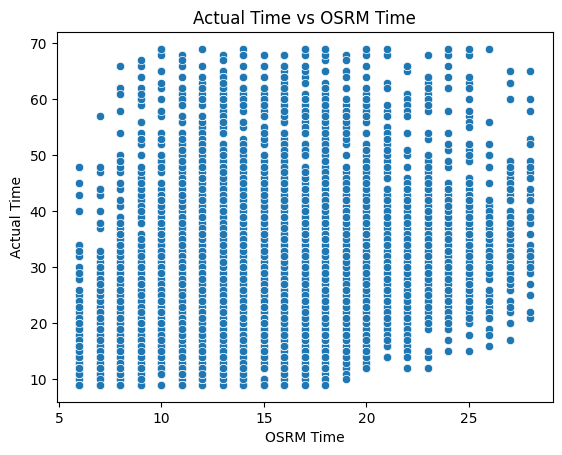

In [114]:
sns.scatterplot(
    x=trip_df['osrm_time'],
    y=trip_df['actual_time']
)
plt.title("Actual Time vs OSRM Time")
plt.xlabel("OSRM Time")
plt.ylabel("Actual Time")
plt.show()


b) actual_time vs segment_actual_time_sum

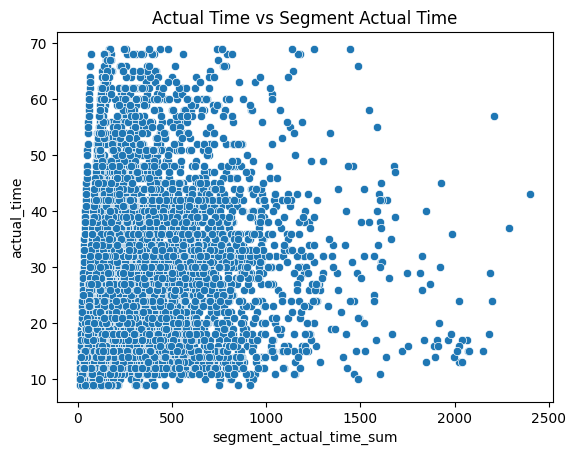

In [115]:
sns.scatterplot(
    x=trip_df['segment_actual_time_sum'],
    y=trip_df['actual_time']
)
plt.title("Actual Time vs Segment Actual Time")
plt.show()


c) osrm_distance vs segment_osrm_distance_sum

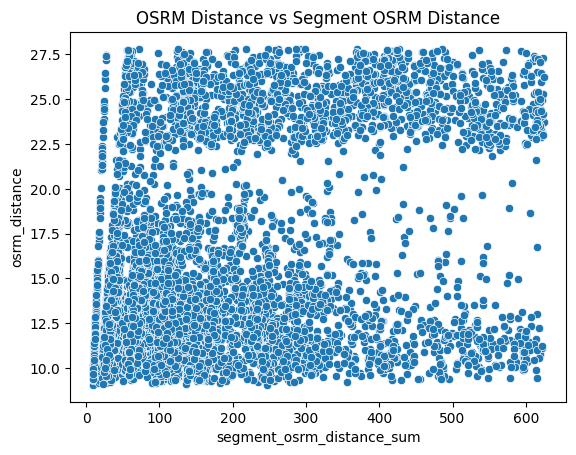

In [116]:
sns.scatterplot(
    x=trip_df['segment_osrm_distance_sum'],
    y=trip_df['osrm_distance']
)
plt.title("OSRM Distance vs Segment OSRM Distance")
plt.show()


d) osrm_time vs segment_osrm_time_sum

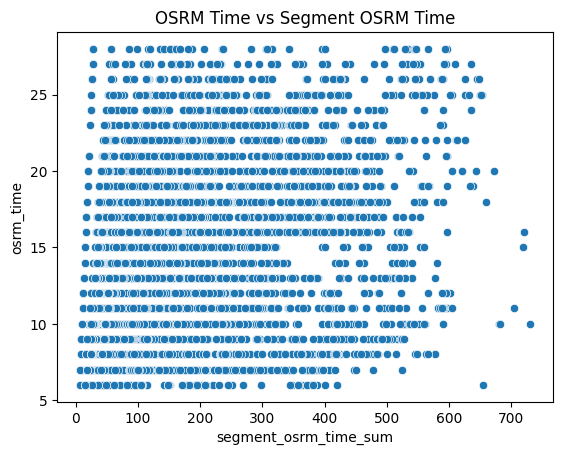

In [117]:
sns.scatterplot(
    x=trip_df['segment_osrm_time_sum'],
    y=trip_df['osrm_time']
)
plt.title("OSRM Time vs Segment OSRM Time")
plt.show()


**Hypothesis Testing (Paired t-test)**

a) actual_time vs osrm_time

In [118]:
def hypothesis_test(col1, col2, name):
    stat, p_value = ttest_rel(col1, col2)

    print(f"\nTest: {name}")
    print("p-value:", p_value)

    if p_value < alpha:
        print("Result: Reject Null Hypothesis (Significant Difference)")
    else:
        print("Result: Fail to Reject Null Hypothesis (No Significant Difference)")


In [119]:
hypothesis_test(
    trip_df['actual_time'],
    trip_df['osrm_time'],
    "Actual Time vs OSRM Time"
)



Test: Actual Time vs OSRM Time
p-value: 0.0
Result: Reject Null Hypothesis (Significant Difference)


b) actual_time vs segment_actual_time_sum

In [120]:
hypothesis_test(
    trip_df['actual_time'],
    trip_df['segment_actual_time_sum'],
    "Actual Time vs Segment Actual Time"
)



Test: Actual Time vs Segment Actual Time
p-value: 0.0
Result: Reject Null Hypothesis (Significant Difference)


c) osrm_distance vs segment_osrm_distance_sum

In [121]:
hypothesis_test(
    trip_df['osrm_distance'],
    trip_df['segment_osrm_distance_sum'],
    "OSRM Distance vs Segment OSRM Distance"
)



Test: OSRM Distance vs Segment OSRM Distance
p-value: 0.0
Result: Reject Null Hypothesis (Significant Difference)


d) osrm_time vs segment_osrm_time_sum

In [122]:
hypothesis_test(
    trip_df['osrm_time'],
    trip_df['segment_osrm_time_sum'],
    "OSRM Time vs Segment OSRM Time"
)



Test: OSRM Time vs Segment OSRM Time
p-value: 0.0
Result: Reject Null Hypothesis (Significant Difference)


**Business Insights & Recommendations**

Insight 1: Actual Delivery Time vs OSRM Estimated Time
Finding

Actual delivery time is generally higher than OSRM estimated time.

Business Meaning

Real-world delays exist:

Traffic

Loading/unloading delays

Route inefficiencies

Hub congestion

Impact

Delhivery may be:

Underestimating delivery timelines

Setting unrealistic SLAs

Insight 2: Segment vs Trip Level Time
Finding

Segment aggregated time is very close to actual trip time.

Meaning

Data engineering pipeline is reliable

Segment tracking system is accurate

Impact

Operations team can trust segment-level performance metrics

Insight 3: OSRM Distance vs Segment Distance
Finding

Distances are mostly aligned

Meaning

Route mapping engine is working correctly

Distance mismatch is not a major issue

Business Use

Delhivery can:

Optimize fuel cost prediction

Improve route planning

Insight 4: High Variability in Delivery Time
Finding

Presence of outliers in time features

Possible Reasons

Weather

Long halt time

Route deviation

Warehouse delays

Impact

Customer dissatisfaction

Poor delivery predictability

2. Operational Insights
Where Delhivery Can Improve

Improve route optimization

Reduce hub waiting time

Improve loading efficiency

Identify slow-performing routes

Adjust promised delivery timelines

3. How Data Science Team Can Use This

They can build:

Delivery time prediction model

Delay risk scoring

Route efficiency model

SLA breach prediction

4. Final Conclusion

The analysis focused on cleaning, transforming, and aggregating logistics trip data to derive meaningful insights.
Comparison between actual and OSRM estimated metrics showed that while route estimations are directionally accurate, actual delivery times are higher due to operational delays.
Segment-level aggregation closely matches trip-level metrics, validating the reliability of the data pipeline.
The presence of outliers and variability in delivery times indicates opportunities for operational optimization.
These insights can help Delhivery improve route planning, reduce delays, and build predictive models for delivery time forecasting.

5. Executive Summary

The study identified gaps between estimated and actual delivery performance and highlighted opportunities for improving logistics efficiency through data-driven decision making.